# Project: Investigate Udemy Dataset

### Table of Contents

**In this notebook:**

* [Introduction](#Introduction)
* [Data Wrangling](#Data_Wrangling)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
* [Conclusions](#Conclusions)

## Introduction

## About Udemy Dataset

#### This Data set contains 3000+  entries for all courses data & subjects in Udemy application which we need to investigate to answer questions about subscribers and courses prices

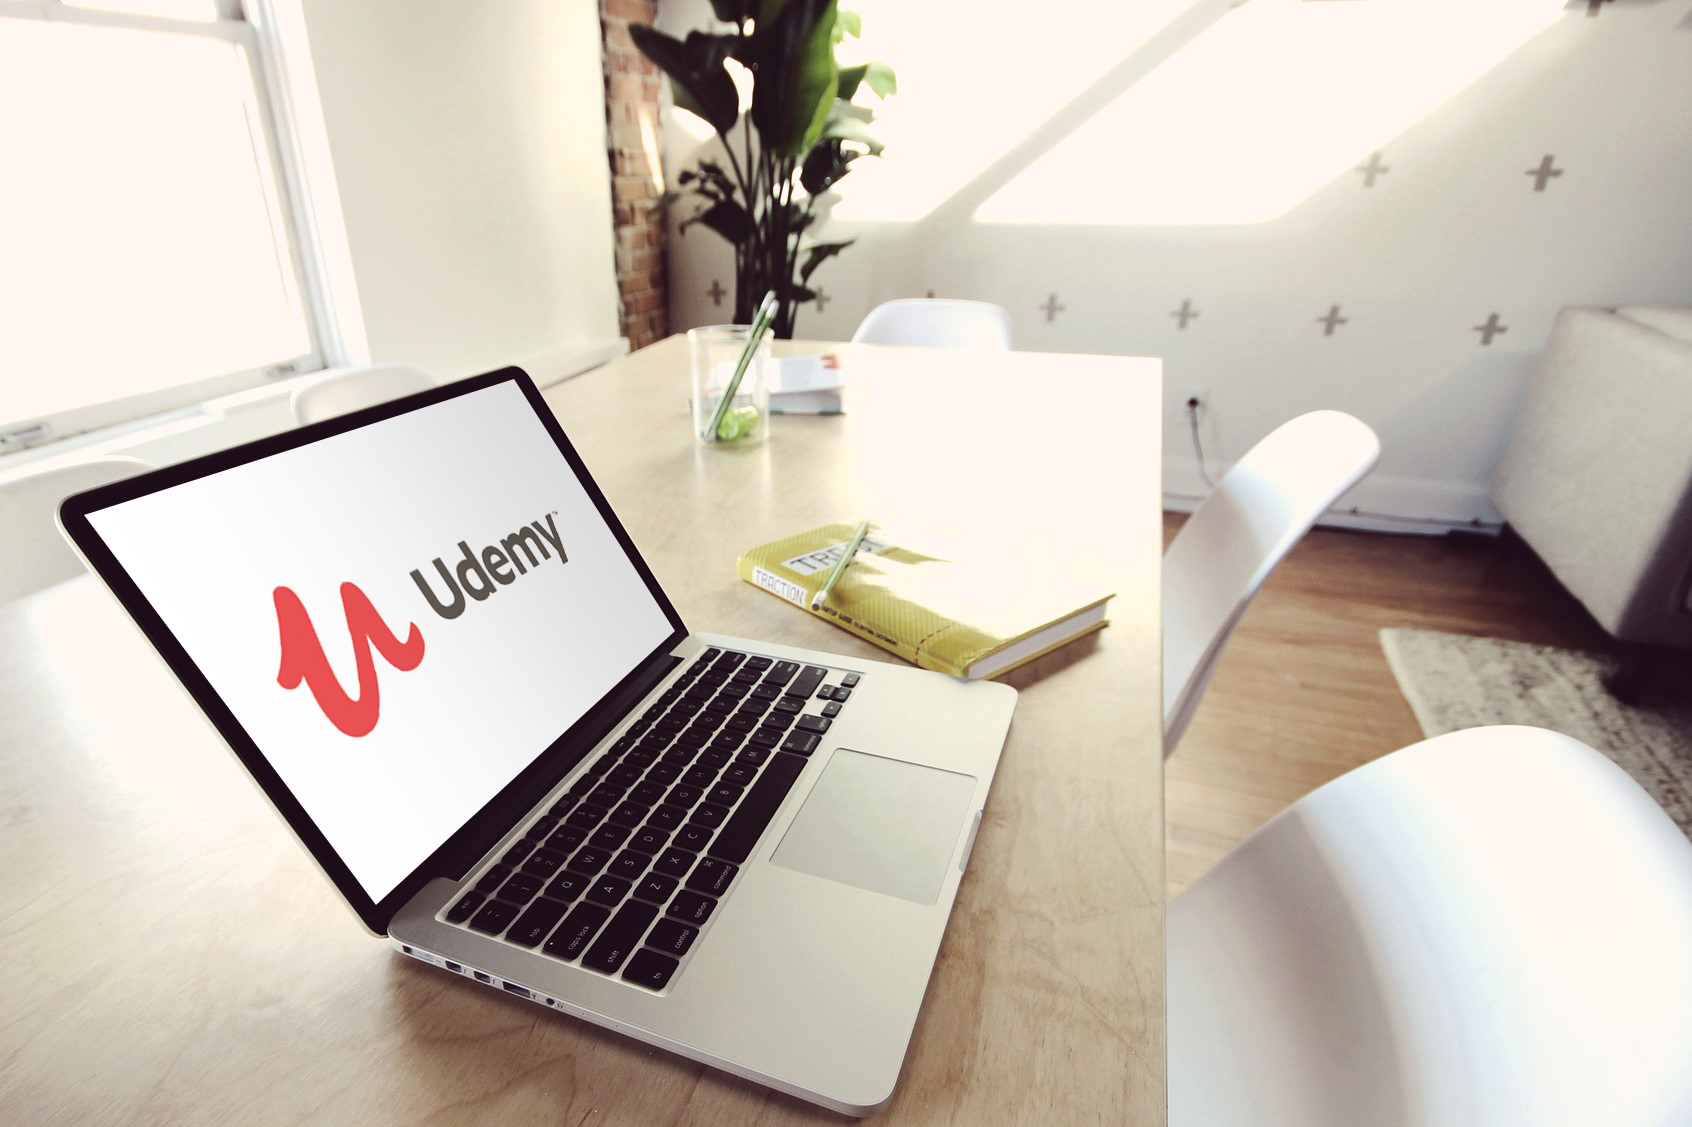

In [1]:
from IPython.display import Image
Image(filename="udemy_erfahrung.jpg", width=900, height=200)

### Based on the dataset, we will work on answering the following Questions:

* How many courses for each subject is udemy offering?
* Which subject has the maximum number of Courses?
* How many free courses are there for every subject?
* How many paid courses are there for every subject?
* What are the Top selling books?
* What the courses that are pubished in year 2015?
* What is the maximum number of Subscribers for each level of courses?
* Is there a relationship between number of lectures and number of subscribers?
* Is there a relationship between the price of the course and the number of subscribers
* What is the kind of relationship between price and number of lectures

In [94]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [248]:
# load Dataset

df=pd.read_csv('Udemy Courses.csv')

## Data_Wrangling

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [68]:
df.head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [266]:
df.tail()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,0,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance
3681,964478,Zombie Apocalypse Photoshop Actions,True,50,12,1,15,All Levels,1.5 hours,2016-09-26T22:19:48Z,Graphic Design


In [69]:
# checking for duplicates

df.duplicated().all()

False

### Observations

1. Data consists of 3682 Rows and 11 columns
2. There are no null values in the data
3. There are no duplicated rows in the Data
4. Data types vary among int,object,bool

## Data Cleaning

**Fisrt**,I Changed the Published_timestamp column data type from string to Datetime 

In [278]:
# Changing Published_timestamp column data type from string to Datetime 

df['published_timestamp']=pd.to_datetime(df['published_timestamp'])

**Second**,I Created a new column with the year values only to answer a related question

In [279]:
# Creat a new column with the year values onlyto answer related questions

df['Year']=df['published_timestamp'].dt.year

**Third**,Change the price column data type into a int. inorder to do that i have to vhange the value ('Free') in the price
column to and make it '0' instead and then transfer it into int.

In [267]:
df.replace({'Free':0},inplace=True)

In [268]:
df['price']=pd.to_numeric(df['price'])

In [269]:
# check for final results

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   int64 
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(5), object(5)
memory usage: 291.4+ KB


## Exploratory_Data_Analysis

Now that the data is clean, let us start our investigation of the above questions. But, first, let's check data statistics and plot some histograms to get an overview of the distribution of different variables and then let's create a heatmap to see how different variables are correlated.

In [275]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,66.010320,3194.230310,156.093156,40.065182
std,3.436355e+05,60.984167,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000
25%,4.078430e+05,20.000000,110.250000,4.000000,15.000000
50%,6.885580e+05,45.000000,911.500000,18.000000,25.000000
75%,9.617515e+05,95.000000,2540.250000,67.000000,45.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000


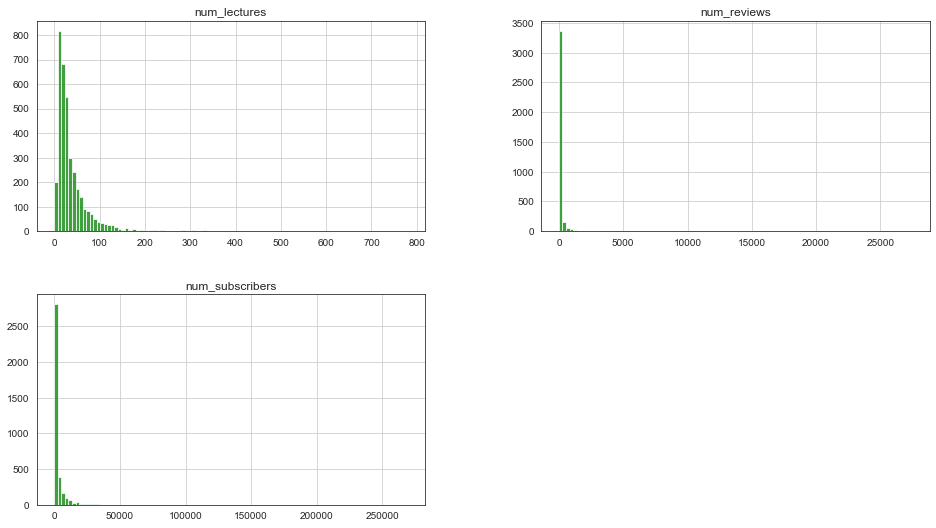

In [200]:
df.hist(column=['num_subscribers','num_reviews','num_lectures'],facecolor='g',figsize=(16,24),layout=(5,2),alpha=0.75,bins=100);                                                                      

## Observations

* Number of lectures in different courses are mostly concentrated from 0 to 100 as per the histogram and so few from 100 to 300
* Number of subscribers for the different courses is between 0 to 20000 and so few from 30000 to 50000
* Number reviews for different courses are concentrated between 0 and 1000 and so few from 1000 to 5000

In [280]:
Matrix=df[['is_paid','num_subscribers','num_reviews','num_lectures','Year','price']].corr()
Matrix

,is_paid,num_subscribers,num_reviews,num_lectures,Year,price
is_paid,1.000000,-0.266227,-0.087519,0.112267,-0.017155,0.328239
num_subscribers,-0.266227,1.000000,0.649957,0.157929,-0.184796,0.050939
num_reviews,-0.087519,0.649957,1.000000,0.243083,-0.053501,0.113778
num_lectures,0.112267,0.157929,0.243083,1.000000,-0.026196,0.330495
Year,-0.017155,-0.184796,-0.053501,-0.026196,1.000000,0.131990
price,0.328239,0.050939,0.113778,0.330495,0.131990,1.000000


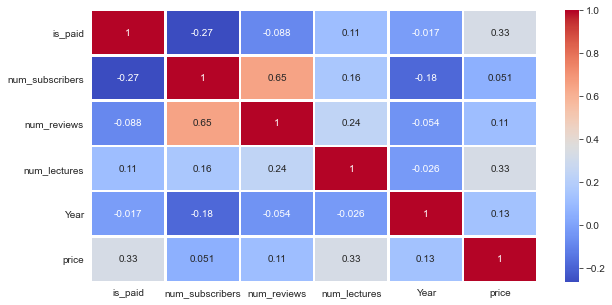

In [282]:
plt.figure(figsize=(10,5));
sns.heatmap(Matrix,annot=True,cmap='coolwarm',linewidth=1.5);

## Observations

1.Strong correlation:

* no strong correlation between variables

2-Moderate correlations:

* num_subscribers and num_reviews
* num_lectures and num_reviews


## Questions

### Q1.How many courses for each subject is udemy offering?

In [12]:
count_courses=df.groupby(['subject'])['course_id'].count()
count_courses

subject
Business Finance       1199
Graphic Design          603
Musical Instruments     680
Web Development        1200
Name: course_id, dtype: int64

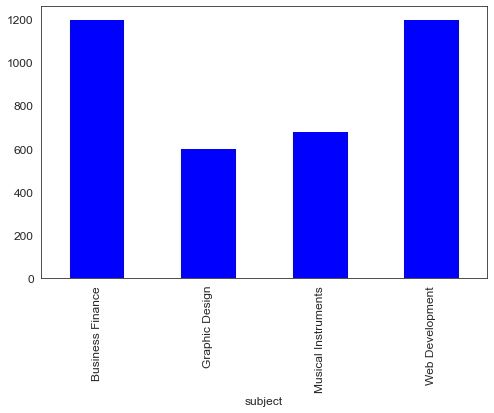

In [333]:
count_courses.plot.bar(figsize=(8,5),color='blue');

Udemy is offering Courses for:

1. Business Finance
2. Graphic Design
3. Musical instruments
4. Web Development

### Q2.Which subject has the maximum number of Courses

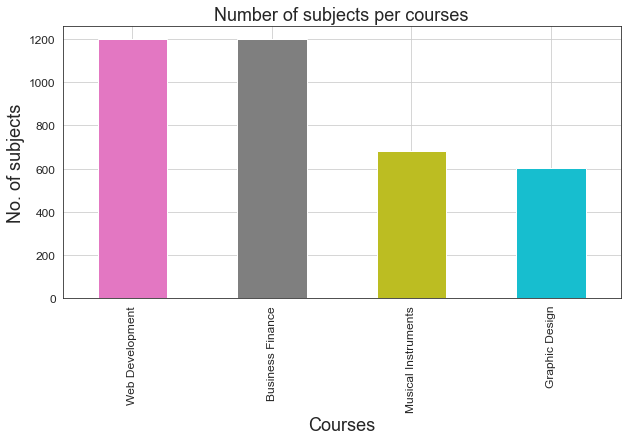

In [328]:
Maximum_courses=df.groupby(['subject'])['course_id'].count().sort_values(ascending=False)
colors=['#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(10,5));
Maximum_courses.plot.bar(color=colors,zorder=3);
plt.title('Number of subjects per courses',size=18);
plt.ylabel('No. of subjects',size=18);
plt.xlabel('Courses',size=18);
plt.grid(zorder=0)

In [364]:
Maximum_courses.head(1)

subject
Web Development    1200
Name: course_id, dtype: int64

#### Maximum number of subjects are in Web Development

### Q3.How many free courses are there for every subject?

In [338]:
Free_courses=df[df['price']==0].groupby(['subject'])['course_id'].count()
Free_courses

subject
Business Finance        96
Graphic Design          35
Musical Instruments     46
Web Development        133
Name: course_id, dtype: int64

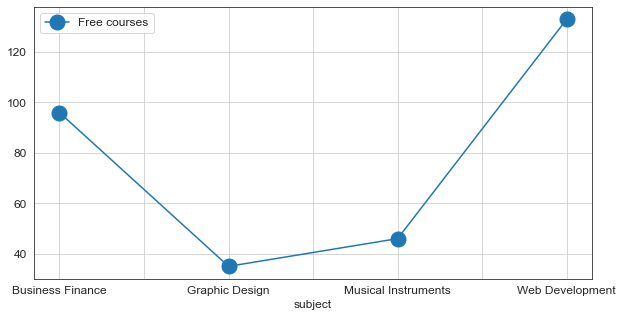

In [329]:
Free_courses.plot.line(figsize=(10,5),markersize=15,marker='o',label='Free courses')
plt.grid()
plt.legend(fontsize=12)
sns.set_style("white");

Count of free courses for every subject are

1. Business Finance-->96
2. Graphic Design-->35
3. Musical Instruments-->46
4. Web Development-->133

### Q4.How many paid courses are there for every subject?

In [341]:
Paid_courses=df[df['price']!='Free'].groupby(['subject'])['course_id'].count()

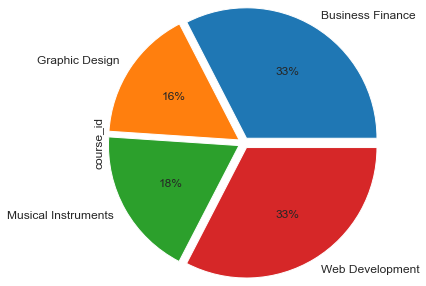

In [332]:
Paid_courses.plot.pie(figsize=(10,5),autopct='%0.f%%',explode=[0.05,0.05,0.05,0.05],radius=1.2);

The count of paid courses for every subject are

Paid_courses
1. Business Finance--->1199
2. Graphic Design--->603
3. Musical Instruments--->680
4. Web Development--->1200

### Q5.What are the Top selling books?

In [347]:
Top_selling=df.groupby(['subject'])['num_subscribers'].sum().sort_values(ascending=False)

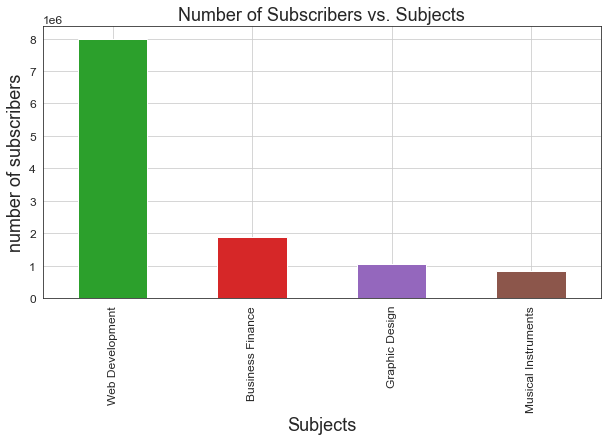

In [361]:
colors2=['#2ca02c', '#d62728', '#9467bd','#8c564b']
plt.figure(figsize=(10,5))
Top_selling.plot.bar(color=colors2,zorder=3);
plt.xlabel('Subjects',size=18);
plt.ylabel('number of subscribers',size=18);
plt.title('Number of Subscribers vs. Subjects',size=18);
plt.grid(zorder=0)

#### Most selling books are for Web development

### Q6.What the courses that are pubished in year 2015?

In [22]:
df[df['Year']==2015]['course_title'].unique()

array(['1 - Concepts of Statistics For Beginners Step by Step',
       '10 Numbers Every Business Owner Should Know',
       '101 Blues riffs - learn how the harmonica superstars do it', ...,
       'Your Own Site in 45 Min: The Complete Wordpress Course',
       'Your Second Course on Piano: Two Handed Playing',
       'Zend Framework 2: Learn the PHP framework ZF2 from scratch'],
      dtype=object)

###  Q7.What is the maximum number of Subscribers for each level of courses?

In [24]:
maximum_subscribers=df.groupby(['subject'])['num_subscribers'].max()
maximum_subscribers

subject
Business Finance        65576
Graphic Design          53851
Musical Instruments    101154
Web Development        268923
Name: num_subscribers, dtype: int64

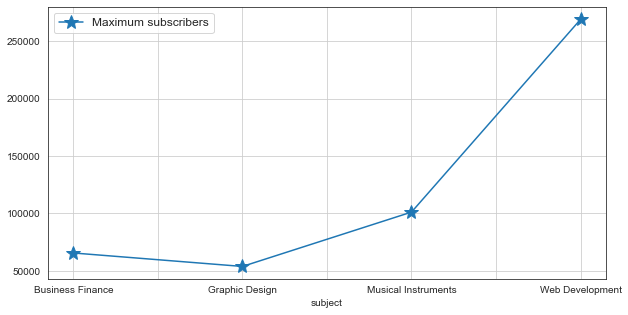

In [243]:
maximum_subscribers.plot.line(figsize=(10,5),marker='*',markersize=15,label='Maximum subscribers');
plt.grid();
plt.legend(fontsize=12);

#### Maximum number of subscribers is for web develoment subject

### Q8.Is there a relationship between number of lectures and number of subscribers?

In [255]:
#calculating pearson correlation between variables

df[['num_lectures','num_subscribers']].corr()

,num_lectures,num_subscribers
num_lectures,1.000000,0.157929
num_subscribers,0.157929,1.000000


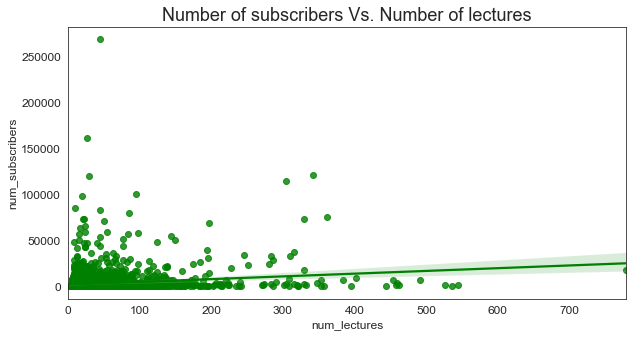

In [365]:
# Visualizing the Relation between them

plt.figure(figsize=(10,5));
sns.regplot(x='num_lectures',y='num_subscribers',data=df,color='g');
plt.title('Number of subscribers Vs. Number of lectures',fontsize=18);

#### We can interpret from the visual and pearson correlation coefficient value of 0.15 that there is almost no relationship between number of  subscribers and number of lectures

### Q9. Is there a relationship between the price of the course and the number of subscribers?

C:\Users\Aellawah\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 720x360 with 0 Axes>

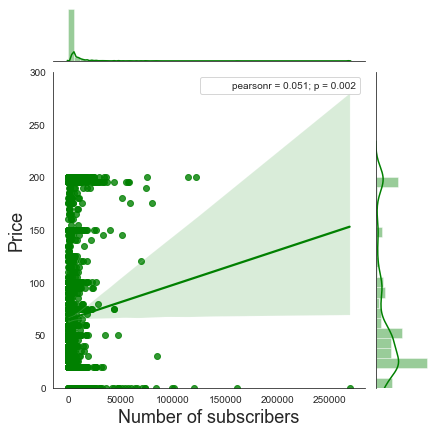

In [293]:
#now lets run the visualization, we added the annotate(stats.pearsonr) to show the pearson correlation

plt.figure(figsize=(10,5));
sns.jointplot(x='num_subscribers',y='price',data=df,color='g',kind='reg').annotate(stats.pearsonr);
plt.ylim(0,300);
plt.xlabel('Number of subscribers',size=18);
plt.ylabel('Price',size=18);

#### We can interpret from the visual and the pearson correlation coefficient value of 0.051 that there is almost no relationship between increase in the price and increaseinn number of subscribers

### Q.10 What is the kind of relationship between price and number of lectures

In [295]:
#calculating pearson correlation between variables

df[['price','num_lectures']].corr()

,price,num_lectures
price,1.000000,0.330495
num_lectures,0.330495,1.000000


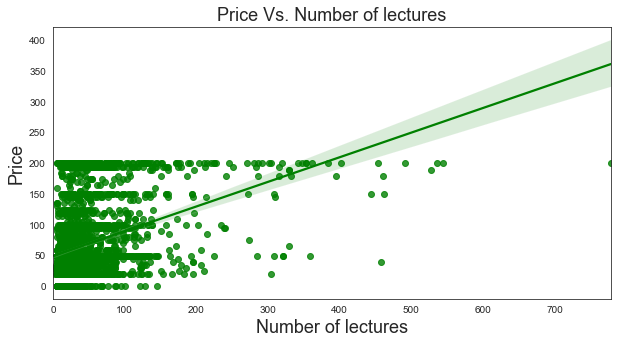

In [301]:
# Visualizing the Relation between them

plt.figure(figsize=(10,5));
sns.regplot(x='num_lectures',y='price',data=df,color='g');
plt.title('Price Vs. Number of lectures',fontsize=18);
plt.ylabel('Price',size=18);
plt.xlabel('Number of lectures',size=18);

#### The visual and the pearson correlation of 0.33 shows that here is a moderate relationship between Price and number of lectures which means as the number of lectures increases the price slightly increases

## Conclusions

### Findings

1- Udemy is offering Courses for:

1. Business Finance
2. Graphic Design
3. Musical instruments
4. Web Development

2- Maximum number of subjects are in Web Development

3- The count of free courses for every subject are

1. Business Finance-->96
2. Graphic Design-->35
3. Musical Instruments-->46
4. Web Development-->133

4- The count of paid courses for every subject are

1. Business Finance--->1199
2. Graphic Design--->603
3. Musical Instruments--->680
4. Web Development--->1200

5- Most selling books are for Web development

6- These are the Book tites that was published in 2015 Concepts of Statistics For Beginners Step by Step','10 Numbers Every Business Owner Should Know','101 Blues riffs - learn how the harmonica superstars do it', ...,'Your Own Site in 45 Min: The Complete Wordpress Course','Your Second Course on Piano: Two Handed Playing','Zend Framework 2: Learn the PHP framework ZF2 from scratch.

7- Maximum number of subscribers is for web develoment subject


8- We can interpret from the visual and pearson correlation coefficient value of 0.15 that there is almost no relationship between number of subscribers and number of lectures

9- We can interpret from the visual and the pearson correlation coefficient value of 0.051 that there is almost no relationship between increase in the price and increaseinn number of subscribers

10- The visual and the pearson correlation of 0.33 shows that here is a moderate relationship between Price and number of lectures which means as the number of lectures increases the price slightly increases